<a href="https://colab.research.google.com/github/TimL2/Group_Project_2_ML_Bot/blob/Shay/SVC_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install alpaca-trade-api
!pip install finta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Initial imports
import pandas as pd
import alpaca_trade_api as tradeapi
from finta import TA
import numpy as np

In [3]:
ALPACA_API_KEY = 'PKETI0Q5C8PPUXVNHJFJ'
ALPACA_SECRET_KEY = 'WQxmEpBCoMXydCCg0G8cUe6hGLpgaAfrvedZ09Fy'
ALPACA_API_BASE_URL = "https://paper-api.alpaca.markets"

In [4]:
# Create a connection to the API 
api = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, ALPACA_API_BASE_URL, api_version="v2")

In [5]:
# Set signal variable
signal = 1

In [6]:
 # Create buy signal, num shares and ticker
if signal == 1:
    orderSide = "buy"
else:
    orderSide = "sell"

In [7]:
# Set the ticket symbol and the number of shares to buy
ticker = "TSLA"
number_of_shares = 1

In [8]:
# Make API call
prices = api.get_bars(ticker, "5Min", "2022-08-22", "2022-10-14", adjustment='raw').df

# Reorganize the DataFrame
prices = pd.concat([prices], axis=1, keys=["TSLA"])

In [9]:
prices

TSLA                                             \
                             open    high     low   close volume trade_count   
timestamp                                                                      
2022-08-22 05:55:00+00:00  884.50  884.50  884.50  884.50    105           3   
2022-08-22 08:00:00+00:00  875.95  877.95  867.99  867.99  19561        1203   
2022-08-22 08:05:00+00:00  868.33  871.00  868.33  870.50  20461         923   
2022-08-22 08:10:00+00:00  870.10  870.60  869.00  870.60   7189         480   
2022-08-22 08:15:00+00:00  869.11  871.00  869.00  871.00   7821         545   
...                           ...     ...     ...     ...    ...         ...   
2022-10-14 23:35:00+00:00  204.50  204.50  204.17  204.42  10743         340   
2022-10-14 23:40:00+00:00  204.40  204.71  204.30  204.32  11217         393   
2022-10-14 23:45:00+00:00  204.32  204.65  204.31  204.35   7935         419   
2022-10-14 23:50:00+00:00  204.35  204.51  204.25  204.37  24208         603   
2022-10-14 23:55:00+00:00  204.37  204.49  204.30  204.43  23177         607   

                                       
                                 vwap  
timestamp                              
2022-08-22 05:55:00+00:00  884.504762  
2022-08-22 08:00:00+00:00  872.356079  
2022-08-22 08:05:00+00:00  870.052425  
2022-08-22 08:10:00+00:00  869.877215  
2022-08-22 08:15:00+00:00  870.159190  
...                               ...  
2022-10-14 23:35:00+00:00  204.383027  
2022-10-14 23:40:00+00:00  204.469150  
2022-10-14 23:45:00+00:00  204.405887  
2022-10-14 23:50:00+00:00  204.404494  
2022-10-14 23:55:00+00:00  204.373827  

[7567 rows x 7 columns]

In [10]:
# Dropping a level down
prices.columns = prices.columns.droplevel(0)

In [11]:
signals_df = prices
signals_df

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-08-22 05:55:00+00:00,884.50,884.50,884.50,884.50,105,3,884.504762
2022-08-22 08:00:00+00:00,875.95,877.95,867.99,867.99,19561,1203,872.356079
2022-08-22 08:05:00+00:00,868.33,871.00,868.33,870.50,20461,923,870.052425
2022-08-22 08:10:00+00:00,870.10,870.60,869.00,870.60,7189,480,869.877215
2022-08-22 08:15:00+00:00,869.11,871.00,869.00,871.00,7821,545,870.159190
...,...,...,...,...,...,...,...
2022-10-14 23:35:00+00:00,204.50,204.50,204.17,204.42,10743,340,204.383027
2022-10-14 23:40:00+00:00,204.40,204.71,204.30,204.32,11217,393,204.469150
2022-10-14 23:45:00+00:00,204.32,204.65,204.31,204.35,7935,419,204.405887


In [12]:
#  Setup EMAs for crosses later
signals_df["9EMA"] = TA.EMA(signals_df, 9)
signals_df["20EMA"] = TA.EMA(signals_df, 20)
signals_df["50EMA"] = TA.EMA(signals_df, 50)
signals_df["200SMA"] = TA.SMA(signals_df, 200)

# Setup Indicators
signals_df["ATR"] = TA.ATR(signals_df)
bbands_df = TA.BBANDS(signals_df)
macd_df = TA.MACD(signals_df)
signals_df["OBV"] = TA.OBV(signals_df)
signals_df["RSI"] = TA.RSI(signals_df)



In [13]:
bbands_df

,BB_UPPER,BB_MIDDLE,BB_LOWER
timestamp,,,
2022-08-22 05:55:00+00:00,NaN,NaN,NaN
2022-08-22 08:00:00+00:00,NaN,NaN,NaN
2022-08-22 08:05:00+00:00,NaN,NaN,NaN
2022-08-22 08:10:00+00:00,NaN,NaN,NaN
2022-08-22 08:15:00+00:00,NaN,NaN,NaN
...,...,...,...
2022-10-14 23:35:00+00:00,204.407633,204.1715,203.935367
2022-10-14 23:40:00+00:00,204.425020,204.1825,203.939980
2022-10-14 23:45:00+00:00,204.445263,204.1950,203.944737


In [14]:
macd_df

,MACD,SIGNAL
timestamp,,
2022-08-22 05:55:00+00:00,0.000000,0.000000
2022-08-22 08:00:00+00:00,-0.370417,-0.205787
2022-08-22 08:05:00+00:00,-0.394149,-0.282985
2022-08-22 08:10:00+00:00,-0.391673,-0.319803
2022-08-22 08:15:00+00:00,-0.366165,-0.333595
...,...,...
2022-10-14 23:35:00+00:00,-0.083409,-0.168235
2022-10-14 23:40:00+00:00,-0.069355,-0.148459
2022-10-14 23:45:00+00:00,-0.055160,-0.129799


In [15]:
signals_df

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,200SMA,ATR,OBV,RSI
timestamp,,,,,,,,,,,,,,
2022-08-22 05:55:00+00:00,884.50,884.50,884.50,884.50,105,3,884.504762,884.500000,884.500000,884.500000,NaN,NaN,NaN,NaN
2022-08-22 08:00:00+00:00,875.95,877.95,867.99,867.99,19561,1203,872.356079,875.327778,875.832250,876.079900,NaN,NaN,-19561.0,0.000000
2022-08-22 08:05:00+00:00,868.33,871.00,868.33,870.50,20461,923,870.052425,873.349180,873.874280,874.145049,NaN,NaN,900.0,14.068943
2022-08-22 08:10:00+00:00,870.10,870.60,869.00,870.60,7189,480,869.877215,872.417886,872.929046,873.204916,NaN,NaN,8089.0,14.584539
2022-08-22 08:15:00+00:00,869.11,871.00,869.00,871.00,7821,545,870.159190,871.996097,872.462426,872.727963,NaN,NaN,15910.0,16.736614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14 23:35:00+00:00,204.50,204.50,204.17,204.42,10743,340,204.383027,204.242027,204.233724,205.005395,213.60557,0.179286,-16008143.0,52.805902
2022-10-14 23:40:00+00:00,204.40,204.71,204.30,204.32,11217,393,204.469150,204.257621,204.241941,204.978517,213.52467,0.197857,-16019360.0,49.965844
2022-10-14 23:45:00+00:00,204.32,204.65,204.31,204.35,7935,419,204.405887,204.276097,204.252232,204.953869,213.44292,0.207857,-16011425.0,50.820390


In [16]:
# join signals
bbands_df = pd.concat([bbands_df, macd_df], axis=1)
signals_df = pd.concat([signals_df, bbands_df], axis=1)
signals_df.drop(columns="SIGNAL", inplace=True)
signals_df

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,200SMA,ATR,OBV,RSI,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD
timestamp,,,,,,,,,,,,,,,,,,
2022-08-22 05:55:00+00:00,884.50,884.50,884.50,884.50,105,3,884.504762,884.500000,884.500000,884.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2022-08-22 08:00:00+00:00,875.95,877.95,867.99,867.99,19561,1203,872.356079,875.327778,875.832250,876.079900,NaN,NaN,-19561.0,0.000000,NaN,NaN,NaN,-0.370417
2022-08-22 08:05:00+00:00,868.33,871.00,868.33,870.50,20461,923,870.052425,873.349180,873.874280,874.145049,NaN,NaN,900.0,14.068943,NaN,NaN,NaN,-0.394149
2022-08-22 08:10:00+00:00,870.10,870.60,869.00,870.60,7189,480,869.877215,872.417886,872.929046,873.204916,NaN,NaN,8089.0,14.584539,NaN,NaN,NaN,-0.391673
2022-08-22 08:15:00+00:00,869.11,871.00,869.00,871.00,7821,545,870.159190,871.996097,872.462426,872.727963,NaN,NaN,15910.0,16.736614,NaN,NaN,NaN,-0.366165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14 23:35:00+00:00,204.50,204.50,204.17,204.42,10743,340,204.383027,204.242027,204.233724,205.005395,213.60557,0.179286,-16008143.0,52.805902,204.407633,204.1715,203.935367,-0.083409
2022-10-14 23:40:00+00:00,204.40,204.71,204.30,204.32,11217,393,204.469150,204.257621,204.241941,204.978517,213.52467,0.197857,-16019360.0,49.965844,204.425020,204.1825,203.939980,-0.069355
2022-10-14 23:45:00+00:00,204.32,204.65,204.31,204.35,7935,419,204.405887,204.276097,204.252232,204.953869,213.44292,0.207857,-16011425.0,50.820390,204.445263,204.1950,203.944737,-0.055160


In [17]:
# Position Relative to BollingerBands, Above BB = 1, Below BB = -1, Inbetween both = 0
signals_df["Bollinger_Bands_Position"] = 0.0
# 9EMA is above 20EMA = 1
signals_df["9EMA>20EMA"] = 0.0
# 50 EMA is above 200SMA = 1
signals_df["50EMA>200SMA"] = 0.0
# MACD Increasing = 1, Decreasing = -1
signals_df["MACD"] = 0.0
# OBV is positive = 1
signals_df["OBV_Over/Under"] = 0.0
# Position Relative to RSI = 70 & RSI = 30
signals_df["RSI_Position"] = 0.0
# Price is above VWAP = 1
signals_df["VWAP_Cross"] = 0.0

In [18]:
signals_df

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-22 05:55:00+00:00,884.50,884.50,884.50,884.50,105,3,884.504762,884.500000,884.500000,884.500000,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:00:00+00:00,875.95,877.95,867.99,867.99,19561,1203,872.356079,875.327778,875.832250,876.079900,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:05:00+00:00,868.33,871.00,868.33,870.50,20461,923,870.052425,873.349180,873.874280,874.145049,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:10:00+00:00,870.10,870.60,869.00,870.60,7189,480,869.877215,872.417886,872.929046,873.204916,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:15:00+00:00,869.11,871.00,869.00,871.00,7821,545,870.159190,871.996097,872.462426,872.727963,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14 23:35:00+00:00,204.50,204.50,204.17,204.42,10743,340,204.383027,204.242027,204.233724,205.005395,...,204.407633,204.1715,203.935367,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-14 23:40:00+00:00,204.40,204.71,204.30,204.32,11217,393,204.469150,204.257621,204.241941,204.978517,...,204.425020,204.1825,203.939980,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-14 23:45:00+00:00,204.32,204.65,204.31,204.35,7935,419,204.405887,204.276097,204.252232,204.953869,...,204.445263,204.1950,203.944737,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where -1 is when the Close price is less than the BB_LOWER window
# where 1 is when the Close price is greater the the BB_UPPER window
for index, row in signals_df.iterrows():
    if row["close"] < row["BB_LOWER"]:
        signals_df.loc[index, "Bollinger_Bands_Position"] = -1.0
    if row["close"] > row["BB_UPPER"]:
        signals_df.loc[index,"Bollinger_Bands_Position"] = 1.0

# Review the DataFrame
signals_df

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-22 05:55:00+00:00,884.50,884.50,884.50,884.50,105,3,884.504762,884.500000,884.500000,884.500000,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:00:00+00:00,875.95,877.95,867.99,867.99,19561,1203,872.356079,875.327778,875.832250,876.079900,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:05:00+00:00,868.33,871.00,868.33,870.50,20461,923,870.052425,873.349180,873.874280,874.145049,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:10:00+00:00,870.10,870.60,869.00,870.60,7189,480,869.877215,872.417886,872.929046,873.204916,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:15:00+00:00,869.11,871.00,869.00,871.00,7821,545,870.159190,871.996097,872.462426,872.727963,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14 23:35:00+00:00,204.50,204.50,204.17,204.42,10743,340,204.383027,204.242027,204.233724,205.005395,...,204.407633,204.1715,203.935367,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2022-10-14 23:40:00+00:00,204.40,204.71,204.30,204.32,11217,393,204.469150,204.257621,204.241941,204.978517,...,204.425020,204.1825,203.939980,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-14 23:45:00+00:00,204.32,204.65,204.31,204.35,7935,419,204.405887,204.276097,204.252232,204.953869,...,204.445263,204.1950,203.944737,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["9EMA>20EMA"][9:] = np.where(
    signals_df["9EMA"][9:] > signals_df["20EMA"][9:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["9EMA>20EMA"] = signals_df["9EMA>20EMA"].diff()

# Review the DataFrame
signals_df.head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-22 05:55:00+00:00,884.50,884.50,884.50,884.50,105,3,884.504762,884.500000,884.500000,884.500000,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2022-08-22 08:00:00+00:00,875.95,877.95,867.99,867.99,19561,1203,872.356079,875.327778,875.832250,876.079900,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:05:00+00:00,868.33,871.00,868.33,870.50,20461,923,870.052425,873.349180,873.874280,874.145049,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:10:00+00:00,870.10,870.60,869.00,870.60,7189,480,869.877215,872.417886,872.929046,873.204916,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:15:00+00:00,869.11,871.00,869.00,871.00,7821,545,870.159190,871.996097,872.462426,872.727963,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:20:00+00:00,871.07,871.90,871.00,871.80,3751,268,871.208325,871.942944,872.322684,872.557433,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:25:00+00:00,870.25,870.25,870.00,870.00,3624,282,870.160924,871.451237,871.883522,872.146814,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:30:00+00:00,870.06,870.20,869.00,869.00,5496,344,869.505364,870.862158,871.385091,871.696238,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:35:00+00:00,869.12,869.50,868.60,868.60,4333,264,869.266280,870.339589,870.938349,871.294657,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["50EMA>200SMA"][50:] = np.where(
    signals_df["50EMA"][50:] > signals_df["200SMA"][50:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["50EMA>200SMA"] = signals_df["50EMA>200SMA"].diff()

# Review the DataFrame
signals_df.head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-22 05:55:00+00:00,884.50,884.50,884.50,884.50,105,3,884.504762,884.500000,884.500000,884.500000,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2022-08-22 08:00:00+00:00,875.95,877.95,867.99,867.99,19561,1203,872.356079,875.327778,875.832250,876.079900,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:05:00+00:00,868.33,871.00,868.33,870.50,20461,923,870.052425,873.349180,873.874280,874.145049,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:10:00+00:00,870.10,870.60,869.00,870.60,7189,480,869.877215,872.417886,872.929046,873.204916,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:15:00+00:00,869.11,871.00,869.00,871.00,7821,545,870.159190,871.996097,872.462426,872.727963,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:20:00+00:00,871.07,871.90,871.00,871.80,3751,268,871.208325,871.942944,872.322684,872.557433,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:25:00+00:00,870.25,870.25,870.00,870.00,3624,282,870.160924,871.451237,871.883522,872.146814,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:30:00+00:00,870.06,870.20,869.00,869.00,5496,344,869.505364,870.862158,871.385091,871.696238,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:35:00+00:00,869.12,869.50,868.60,868.60,4333,264,869.266280,870.339589,870.938349,871.294657,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
signals_df["50EMA>200SMA"].value_counts()

 0.0    7518
 1.0      24
-1.0      24
Name: 50EMA>200SMA, dtype: int64

In [23]:
# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["OBV_Over/Under"] = np.where(
    signals_df["OBV"] > 0, 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["OBV_Over/Under"] = signals_df["OBV_Over/Under"].diff()

# Review the DataFrame
signals_df.head(30)

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-22 05:55:00+00:00,884.50,884.50,884.50,884.50,105,3,884.504762,884.500000,884.500000,884.500000,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0
2022-08-22 08:00:00+00:00,875.95,877.95,867.99,867.99,19561,1203,872.356079,875.327778,875.832250,876.079900,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:05:00+00:00,868.33,871.00,868.33,870.50,20461,923,870.052425,873.349180,873.874280,874.145049,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2022-08-22 08:10:00+00:00,870.10,870.60,869.00,870.60,7189,480,869.877215,872.417886,872.929046,873.204916,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:15:00+00:00,869.11,871.00,869.00,871.00,7821,545,870.159190,871.996097,872.462426,872.727963,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:20:00+00:00,871.07,871.90,871.00,871.80,3751,268,871.208325,871.942944,872.322684,872.557433,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:25:00+00:00,870.25,870.25,870.00,870.00,3624,282,870.160924,871.451237,871.883522,872.146814,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:30:00+00:00,870.06,870.20,869.00,869.00,5496,344,869.505364,870.862158,871.385091,871.696238,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-22 08:35:00+00:00,869.12,869.50,868.60,868.60,4333,264,869.266280,870.339589,870.938349,871.294657,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
signals_df["OBV_Over/Under"].value_counts()

 0.0    7368
 1.0      99
-1.0      99
Name: OBV_Over/Under, dtype: int64

In [25]:
# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where -1 is when the Close price is less than the BB_LOWER window
# where 1 is when the Close price is greater the the BB_UPPER window
for index, row in signals_df.iterrows():
    if 30 > row["RSI"]:
        signals_df.loc[index, "RSI_Position"] = -1.0
    if 70 < row["RSI"]:
        signals_df.loc[index,"RSI_Position"] = 1.0

# Review the DataFrame
signals_df

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-22 05:55:00+00:00,884.50,884.50,884.50,884.50,105,3,884.504762,884.500000,884.500000,884.500000,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0
2022-08-22 08:00:00+00:00,875.95,877.95,867.99,867.99,19561,1203,872.356079,875.327778,875.832250,876.079900,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-08-22 08:05:00+00:00,868.33,871.00,868.33,870.50,20461,923,870.052425,873.349180,873.874280,874.145049,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
2022-08-22 08:10:00+00:00,870.10,870.60,869.00,870.60,7189,480,869.877215,872.417886,872.929046,873.204916,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-08-22 08:15:00+00:00,869.11,871.00,869.00,871.00,7821,545,870.159190,871.996097,872.462426,872.727963,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14 23:35:00+00:00,204.50,204.50,204.17,204.42,10743,340,204.383027,204.242027,204.233724,205.005395,...,204.407633,204.1715,203.935367,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2022-10-14 23:40:00+00:00,204.40,204.71,204.30,204.32,11217,393,204.469150,204.257621,204.241941,204.978517,...,204.425020,204.1825,203.939980,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-14 23:45:00+00:00,204.32,204.65,204.31,204.35,7935,419,204.405887,204.276097,204.252232,204.953869,...,204.445263,204.1950,203.944737,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
signals_df["RSI_Position"].value_counts()

 0.0    6567
-1.0     630
 1.0     370
Name: RSI_Position, dtype: int64

In [27]:
# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["VWAP_Cross"] = np.where(
    signals_df["vwap"] < signals_df["close"], 1.0, 0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["VWAP_Cross"] = signals_df["VWAP_Cross"].diff()

# Review the DataFrame
signals_df.head(30)

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-22 05:55:00+00:00,884.50,884.50,884.50,884.50,105,3,884.504762,884.500000,884.500000,884.500000,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2022-08-22 08:00:00+00:00,875.95,877.95,867.99,867.99,19561,1203,872.356079,875.327778,875.832250,876.079900,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-08-22 08:05:00+00:00,868.33,871.00,868.33,870.50,20461,923,870.052425,873.349180,873.874280,874.145049,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,-1.0,1.0
2022-08-22 08:10:00+00:00,870.10,870.60,869.00,870.60,7189,480,869.877215,872.417886,872.929046,873.204916,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-08-22 08:15:00+00:00,869.11,871.00,869.00,871.00,7821,545,870.159190,871.996097,872.462426,872.727963,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-08-22 08:20:00+00:00,871.07,871.90,871.00,871.80,3751,268,871.208325,871.942944,872.322684,872.557433,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-08-22 08:25:00+00:00,870.25,870.25,870.00,870.00,3624,282,870.160924,871.451237,871.883522,872.146814,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0
2022-08-22 08:30:00+00:00,870.06,870.20,869.00,869.00,5496,344,869.505364,870.862158,871.385091,871.696238,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-08-22 08:35:00+00:00,869.12,869.50,868.60,868.60,4333,264,869.266280,870.339589,870.938349,871.294657,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [28]:
signals_df["VWAP_Cross"].value_counts()

 0.0    3763
 1.0    1902
-1.0    1901
Name: VWAP_Cross, dtype: int64

In [29]:
periods = signals_df.shape[0]
periods

7567

In [30]:
signals_df["Exit Price"] = 0
signals_df["Exit"] = 0


In [31]:

# loop thru the dataframe and set variables for use in Exit Price Calculation
for j in range(200, periods):
    # suppose an entry on each candle close (used for Exit Price Calculation)
    entry = signals_df["close"].iloc[j]
    # calculate volatility as a rolling average of the periods' ranges (for stop)
    atr = signals_df["ATR"].iloc[j]
    # stop is 1ATR
    stop = entry - atr
    # target is 3ATR, Risk to Reward is now 3:1
    target = entry + (3 * atr)
    # loop again thru the dataset to compare j entry price to future closing prices to see if we hit target or stop
    for k in range(j + 1, periods):
        # placeholder for this periods' high & low
        curr_low = signals_df["low"].iloc[k]
        curr_high = signals_df["high"].iloc[k]
        # record and break if we hit stop or target, if not we check the next k period
        if curr_low <= stop:
            signals_df["Exit Price"].iloc[j] = stop
            signals_df["Exit"].iloc[j] = "-1R"
            break
        elif curr_high >= target:
            signals_df["Exit Price"].iloc[j] = target
            signals_df["Exit"].iloc[j] = "+3R"
            break

signals_df[:30]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-22 05:55:00+00:00,884.50,884.50,884.50,884.50,105,3,884.504762,884.500000,884.500000,884.500000,...,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0
2022-08-22 08:00:00+00:00,875.95,877.95,867.99,867.99,19561,1203,872.356079,875.327778,875.832250,876.079900,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
2022-08-22 08:05:00+00:00,868.33,871.00,868.33,870.50,20461,923,870.052425,873.349180,873.874280,874.145049,...,NaN,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,0.0,0
2022-08-22 08:10:00+00:00,870.10,870.60,869.00,870.60,7189,480,869.877215,872.417886,872.929046,873.204916,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
2022-08-22 08:15:00+00:00,869.11,871.00,869.00,871.00,7821,545,870.159190,871.996097,872.462426,872.727963,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
2022-08-22 08:20:00+00:00,871.07,871.90,871.00,871.80,3751,268,871.208325,871.942944,872.322684,872.557433,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
2022-08-22 08:25:00+00:00,870.25,870.25,870.00,870.00,3624,282,870.160924,871.451237,871.883522,872.146814,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0
2022-08-22 08:30:00+00:00,870.06,870.20,869.00,869.00,5496,344,869.505364,870.862158,871.385091,871.696238,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
2022-08-22 08:35:00+00:00,869.12,869.50,868.60,868.60,4333,264,869.266280,870.339589,870.938349,871.294657,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0


In [32]:
column_names = signals_df.columns
df = pd.DataFrame(columns = column_names)
df

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit


In [33]:
for index, row in signals_df.iterrows(): 
    if signals_df["Bollinger_Bands_Position"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["Bollinger_Bands_Position"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-14 21:30:00+00:00,204.30,204.37,203.85,203.85,39298,2450,204.113257,204.418543,204.846323,206.500952,...,204.091479,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,203.612857,-1R
2022-10-14 21:35:00+00:00,203.82,204.00,203.68,203.81,30802,1153,203.833658,204.296834,204.747625,206.395425,...,203.933488,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,203.565000,-1R
2022-10-14 21:45:00+00:00,204.05,204.19,203.63,203.63,36578,1305,203.944420,204.123974,204.581072,206.198606,...,203.693636,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,204.465714,+3R
2022-10-14 23:30:00+00:00,204.09,204.50,204.01,204.50,24857,502,204.209702,204.197533,204.214116,205.029289,...,203.870209,0.0,1.0,0.0,0.0,0.0,0.0,1.0,204.320714,-1R
2022-10-14 23:35:00+00:00,204.50,204.50,204.17,204.42,10743,340,204.383027,204.242027,204.233724,205.005395,...,203.935367,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0


In [34]:
for index, row in signals_df.iterrows(): 
    if signals_df["9EMA>20EMA"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["9EMA>20EMA"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-13 09:05:00+00:00,216.61,216.9300,216.6000,216.930,1189,47,216.709983,216.674168,216.670115,216.771018,...,216.055895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,216.607964,-1R
2022-10-14 08:25:00+00:00,221.16,221.1600,221.0000,221.040,8570,227,221.054413,222.015028,222.140327,221.687176,...,219.557432,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,220.529393,-1R
2022-10-14 10:10:00+00:00,221.60,221.6800,221.4000,221.530,3905,131,221.568556,220.982763,220.929192,221.115487,...,219.214160,0.0,0.0,1.0,0.0,0.0,0.0,0.0,223.300000,+3R
2022-10-14 12:35:00+00:00,222.37,222.7000,221.9000,222.700,48435,1024,222.282389,221.705757,221.687819,221.611376,...,220.005499,0.0,0.0,1.0,0.0,0.0,0.0,0.0,225.233307,+3R
2022-10-14 13:45:00+00:00,221.18,221.7044,220.2506,220.295,1843255,21659,220.888148,222.612726,222.760864,222.340522,...,219.915350,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,218.787343,-1R


In [35]:
for index, row in signals_df.iterrows(): 
    if signals_df["50EMA>200SMA"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["50EMA>200SMA"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-13 08:20:00+00:00,216.20,216.20,216.20,216.2000,765,35,216.213529,216.508135,216.696023,216.832889,...,216.188613,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,217.016129,+3R
2022-10-13 09:10:00+00:00,216.93,217.30,216.90,217.3000,8374,247,217.003181,216.799334,216.730104,216.791762,...,216.012445,0.0,0.0,0.0,1.0,0.0,0.0,0.0,216.997964,-1R
2022-10-13 12:50:00+00:00,208.88,209.86,208.50,209.2499,208675,4835,209.219489,212.400782,214.752914,216.174433,...,208.359676,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,207.784129,-1R
2022-10-13 17:10:00+00:00,220.27,220.45,219.32,219.5100,581300,7762,219.818127,219.307853,218.099727,215.915002,...,216.202400,0.0,0.0,0.0,1.0,0.0,0.0,0.0,223.923493,+3R
2022-10-14 14:30:00+00:00,213.66,214.94,213.40,213.4700,1337347,18437,214.203859,215.727202,218.263211,220.267660,...,211.239072,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,211.176586,-1R


In [36]:
for index, row in signals_df.iterrows(): 
    if signals_df["OBV_Over/Under"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["OBV_Over/Under"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-14 14:25:00+00:00,213.49,214.2899,212.35,213.6600,1693319,23720,213.328650,216.291503,218.767759,220.545116,...,212.143930,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,211.361586,-1R
2022-10-14 14:50:00+00:00,212.45,213.8150,212.06,213.2137,1244824,15006,212.956759,214.082938,216.515321,219.189971,...,208.837616,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,211.302343,-1R
2022-10-14 14:55:00+00:00,213.24,213.5311,212.65,213.0700,995768,12661,213.069395,213.880350,216.187195,218.949972,...,208.641871,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,211.199550,-1R
2022-10-14 15:00:00+00:00,213.07,214.4400,212.82,214.4167,1445083,16177,213.638447,213.987620,216.018576,218.772197,...,208.590797,0.0,0.0,0.0,0.0,1.0,0.0,0.0,212.565493,-1R
2022-10-14 15:10:00+00:00,213.03,213.2400,211.65,212.0442,1395328,19939,212.276120,213.446517,215.382976,218.292189,...,208.653977,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,210.360114,-1R


In [37]:
for index, row in signals_df.iterrows(): 
    if signals_df["RSI_Position"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["RSI_Position"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-14 21:10:00+00:00,204.5000,204.50,204.35,204.50,11388,667,204.454148,204.666169,205.125370,206.883768,...,204.318956,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,204.295714,-1R
2022-10-14 21:15:00+00:00,204.5800,204.58,204.39,204.45,9678,674,204.467338,204.622935,205.061049,206.788326,...,204.371896,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,204.246429,-1R
2022-10-14 21:25:00+00:00,204.5115,204.57,204.25,204.37,23065,1005,204.382800,204.560679,204.951199,206.609154,...,204.281848,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,204.160714,-1R
2022-10-14 21:40:00+00:00,203.8000,204.05,203.80,204.05,26059,799,203.935604,204.247467,204.681185,206.303447,...,203.854477,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,203.802857,-1R
2022-10-14 21:55:00+00:00,203.7622,203.85,203.60,203.77,15505,931,203.734523,204.006143,204.439109,206.014123,...,203.533326,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,204.648571,+3R


In [38]:
for index, row in signals_df.iterrows(): 
    if signals_df["VWAP_Cross"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["VWAP_Cross"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-14 23:10:00+00:00,204.19,204.19,204.05,204.10,5787,316,204.106401,204.131088,204.207023,205.169425,...,203.720772,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,204.637857,+3R
2022-10-14 23:15:00+00:00,204.10,204.20,204.07,204.20,6314,345,204.160509,204.144870,204.206355,205.131408,...,203.756629,0.0,0.0,0.0,0.0,0.0,0.0,1.0,204.021429,-1R
2022-10-14 23:20:00+00:00,204.18,204.20,204.10,204.12,4710,269,204.157003,204.139896,204.198130,205.091745,...,203.760026,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,204.649286,+3R
2022-10-14 23:40:00+00:00,204.40,204.71,204.30,204.32,11217,393,204.469150,204.257621,204.241941,204.978517,...,203.939980,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.000000,0
2022-10-14 23:55:00+00:00,204.37,204.49,204.30,204.43,23177,607,204.373827,204.321902,204.279310,204.911326,...,203.940138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0


In [39]:
df

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-08-22 10:35:00+00:00,871.30,871.5000,871.30,871.5000,1874,57,871.369993,869.938250,869.529312,869.555444,...,866.249203,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0
2022-08-22 11:55:00+00:00,871.50,873.4748,871.50,873.0153,13032,701,872.322124,871.425752,870.893528,870.445161,...,869.071714,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0
2022-08-22 12:00:00+00:00,873.00,875.2500,872.85,874.0100,37950,1475,874.250087,871.942656,871.195320,870.618593,...,868.947784,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.000000,0
2022-08-22 12:05:00+00:00,874.50,874.5000,873.11,874.0000,15462,584,873.999963,872.354160,871.466484,870.781564,...,868.840223,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0
2022-08-22 13:20:00+00:00,874.96,875.9000,874.01,875.9000,29149,1434,875.065366,873.698613,872.891273,871.958692,...,870.295950,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14 23:10:00+00:00,204.19,204.1900,204.05,204.1000,5787,316,204.106401,204.131088,204.207023,205.169425,...,203.720772,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,204.637857,+3R
2022-10-14 23:15:00+00:00,204.10,204.2000,204.07,204.2000,6314,345,204.160509,204.144870,204.206355,205.131408,...,203.756629,0.0,0.0,0.0,0.0,0.0,0.0,1.0,204.021429,-1R
2022-10-14 23:20:00+00:00,204.18,204.2000,204.10,204.1200,4710,269,204.157003,204.139896,204.198130,205.091745,...,203.760026,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,204.649286,+3R
2022-10-14 23:40:00+00:00,204.40,204.7100,204.30,204.3200,11217,393,204.469150,204.257621,204.241941,204.978517,...,203.939980,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.000000,0


In [40]:
X = df[["Bollinger_Bands_Position", "9EMA>20EMA", "50EMA>200SMA", "OBV_Over/Under", "RSI_Position", "VWAP_Cross"]]
X

,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
2022-08-22 10:35:00+00:00,1.0,0.0,0.0,0.0,0.0,1.0
2022-08-22 11:55:00+00:00,1.0,0.0,0.0,0.0,0.0,1.0
2022-08-22 12:00:00+00:00,1.0,0.0,0.0,0.0,0.0,-1.0
2022-08-22 12:05:00+00:00,1.0,0.0,0.0,0.0,0.0,1.0
2022-08-22 13:20:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2022-10-14 23:10:00+00:00,0.0,0.0,0.0,0.0,0.0,-1.0
2022-10-14 23:15:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0
2022-10-14 23:20:00+00:00,0.0,0.0,0.0,0.0,0.0,-1.0
2022-10-14 23:40:00+00:00,0.0,0.0,0.0,0.0,0.0,-1.0


In [41]:
y = df["Exit"]
y

2022-08-22 10:35:00+00:00      0
2022-08-22 11:55:00+00:00      0
2022-08-22 12:00:00+00:00      0
2022-08-22 12:05:00+00:00      0
2022-08-22 13:20:00+00:00      0
                            ... 
2022-10-14 23:10:00+00:00    +3R
2022-10-14 23:15:00+00:00    -1R
2022-10-14 23:20:00+00:00    +3R
2022-10-14 23:40:00+00:00      0
2022-10-14 23:55:00+00:00      0
Name: Exit, Length: 4873, dtype: object

# **SVC MODEL**

In [42]:
# Calculate the daily returns using the closing prices and the pct_change function
df["actual_returns"] = df["close"].pct_change()

# Display sample data
df.head()

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit,actual_returns
2022-08-22 10:35:00+00:00,871.30,871.5000,871.30,871.5000,1874,57,871.369993,869.938250,869.529312,869.555444,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,NaN
2022-08-22 11:55:00+00:00,871.50,873.4748,871.50,873.0153,13032,701,872.322124,871.425752,870.893528,870.445161,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.001739
2022-08-22 12:00:00+00:00,873.00,875.2500,872.85,874.0100,37950,1475,874.250087,871.942656,871.195320,870.618593,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0,0.001139
2022-08-22 12:05:00+00:00,874.50,874.5000,873.11,874.0000,15462,584,873.999963,872.354160,871.466484,870.781564,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-0.000011
2022-08-22 13:20:00+00:00,874.96,875.9000,874.01,875.9000,29149,1434,875.065366,873.698613,872.891273,871.958692,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.002174


In [43]:
# Drop all NaN values from the DataFrame
df = df.dropna()

# Review the DataFrame
display(df.head())
display(df.tail())

,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit,actual_returns
2022-08-23 11:25:00+00:00,875.1388,875.1500,873.7200,874.0000,11667,448,874.428145,875.260842,875.617281,874.662040,...,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,875.937143,+3R,-0.005677
2022-08-23 13:00:00+00:00,873.5600,873.9266,872.1400,872.1400,14634,930,872.964875,874.275653,874.976062,874.939863,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,876.398179,+3R,-0.002128
2022-08-23 13:35:00+00:00,873.4100,875.8500,868.2800,868.5350,654670,16590,872.071673,872.476592,873.587233,874.297436,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,866.627964,-1R,-0.004134
2022-08-23 13:40:00+00:00,868.6835,870.7400,863.7700,863.8771,529130,14923,867.748500,870.756694,872.662459,873.888774,...,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,870.722607,+3R,-0.005363
2022-08-23 14:10:00+00:00,878.9300,885.6900,878.6587,883.8100,718749,17369,882.429254,875.457479,874.310715,874.322413,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,897.682129,+3R,0.023074


,open,high,low,close,volume,trade_count,vwap,9EMA,20EMA,50EMA,...,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit,actual_returns
2022-10-14 23:10:00+00:00,204.19,204.19,204.05,204.10,5787,316,204.106401,204.131088,204.207023,205.169425,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,204.637857,+3R,-0.000490
2022-10-14 23:15:00+00:00,204.10,204.20,204.07,204.20,6314,345,204.160509,204.144870,204.206355,205.131408,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,204.021429,-1R,0.000490
2022-10-14 23:20:00+00:00,204.18,204.20,204.10,204.12,4710,269,204.157003,204.139896,204.198130,205.091745,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,204.649286,+3R,-0.000392
2022-10-14 23:40:00+00:00,204.40,204.71,204.30,204.32,11217,393,204.469150,204.257621,204.241941,204.978517,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.000000,0,0.000980
2022-10-14 23:55:00+00:00,204.37,204.49,204.30,204.43,23177,607,204.373827,204.321902,204.279310,204.911326,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0,0.000538


In [44]:
# Define a window size of 9
short_window = 4

# Create an SMA that uses short_window, and assign it to a new column named “sma_fast”
df["sma_fast"] = df["close"].rolling(window=short_window).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [45]:
# Define a window size of 20
long_window = 20

# Create an SMA that uses long_window, and assign it to a new columns named “sma_slow”
df["sma_slow"] = df["close"].rolling(window=short_window).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [46]:
df = df.dropna()

In [47]:
# Assign a copy of the `sma_fast` and `sma_slow` columns to a new DataFrame called `X`
X = df[["sma_fast", "sma_slow"]].shift().dropna().copy()

# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_slow
2022-08-23 14:10:00+00:00,869.638025,869.638025
2022-08-23 14:15:00+00:00,872.090525,872.090525
2022-08-23 14:30:00+00:00,874.930525,874.930525
2022-08-23 17:25:00+00:00,879.719275,879.719275
2022-08-23 17:30:00+00:00,887.059775,887.059775


,sma_fast,sma_slow
2022-10-14 23:10:00+00:00,204.1050,204.1050
2022-10-14 23:15:00+00:00,204.1275,204.1275
2022-10-14 23:20:00+00:00,204.1425,204.1425
2022-10-14 23:40:00+00:00,204.1550,204.1550
2022-10-14 23:55:00+00:00,204.1850,204.1850


In [48]:
# Create a new column in the `prices` called "signal" setting its value to zero.
df["signal"] = 0.0

In [49]:
# Create the signal to sell
df.loc[(df["actual_returns"] < 0), "signal"] = -1

In [50]:
# Copy the new "signal" column to a new Series called `y`.
y = df["signal"].copy()

In [51]:
# Import required libraries
from pandas.tseries.offsets import DateOffset

In [52]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2022-08-23 09:35:00+00:00


In [53]:
# Select the ending period for the training data with an offset of 18 months
training_end = X.index.max()

# Display the training end date
print(training_end)

2022-10-14 23:55:00+00:00


In [54]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

In [55]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

In [56]:
# Import required libraries
from sklearn.preprocessing import StandardScaler

In [57]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [58]:
# Import the SVM model
from sklearn import svm
from sklearn.metrics import classification_report

In [59]:
# Create the classifier model
svm_model = svm.SVC()

# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([-1.,  0., -1., -1., -1.,  0., -1., -1., -1., -1.])

In [60]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)

# Display report
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.51      0.96      0.66      1791
         0.0       0.53      0.05      0.09      1755

    accuracy                           0.51      3546
   macro avg       0.52      0.50      0.38      3546
weighted avg       0.52      0.51      0.38      3546



In [61]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [62]:
# Evaluate the model's ability to predict the trading signal for the testing data
testing_report = classification_report(y_test, testing_signal_predictions)

# Display the report
print(testing_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       0.0
         0.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [63]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = testing_signal_predictions

predictions_df["actual_returns"] = df["actual_returns"]

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
2022-10-14 23:55:00+00:00,-1.0,0.000538,-0.000538


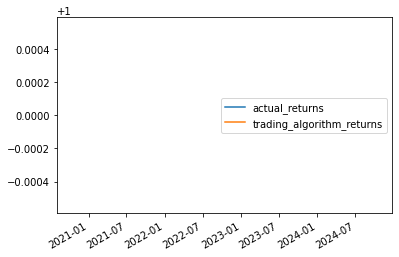

In [64]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()